# K-Nearest Neighbor Lab
Read over the sklearn info on [nearest neighbor learners](https://scikit-learn.org/stable/modules/neighbors.html#nearest-neighbors-classification)




In [56]:
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
import numpy as np
import pandas as pd
from scipy.io import arff
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## 1 K-Nearest Neighbor (KNN) algorithm

### 1.1 (15%) Basic KNN Classification

Learn the [Glass data set](https://archive.ics.uci.edu/dataset/42/glass+identification) using [KNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier) with default parameters.
- Randomly split your data into train/test.  Anytime we don't tell you specifics (such as what percentage is train vs test) choose your own reasonable values
- Give typical train and test set accuracies after running with different random splits
- Print the output probabilities for a test set (predict_proba)
- Try it with different p values (Minkowskian exponent) and discuss any differences

In [57]:
from IPython.display import HTML, display
from tabulate import tabulate

# Learn the glass data
glass_df = pd.read_csv("glass.data")

#extract features X and target variables y
X = glass_df.drop('type', axis=1)
y = glass_df['type']

clf = KNeighborsClassifier()

def analyze_model(clf: KNeighborsClassifier, p_value):
    table = []
    avg_test_acc = 0
    avg_train_acc = 0

    clf.set_params(p=p_value)
    for i in range (0,5):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)
        clf.fit(X_train, y_train)
        
        table.append([i+1, clf.score(X_train, y_train), clf.score(X_test, y_test)])
        avg_train_acc += clf.score(X_train, y_train)
        avg_test_acc += clf.score(X_test, y_test)
        
    avg_train_acc = avg_train_acc/5
    avg_test_acc = avg_test_acc/5

    #print averages
    table.append(["Average", avg_train_acc, avg_test_acc, p_value])
    headers = ["Trial", "Training Accuracy", "Test Accuracy", "P_Value"]
    display(HTML(tabulate(table, headers=headers, tablefmt='html')))
    print("Output probabilities for a test set: " + str(clf.predict_proba(X_test)))

analyze_model(clf, 1.0)
analyze_model(clf, 1.2)
analyze_model(clf, 1.4)
analyze_model(clf, 1.6)
analyze_model(clf, 1.8)
analyze_model(clf, 2.0)


Trial,Training Accuracy,Test Accuracy,P_Value
1,0.988304,1,
2,0.994152,0.976744,
3,0.988304,1,
4,0.994152,0.976744,
5,0.988304,0.930233,
Average,0.990643,0.976744,1


Output probabilities for a test set: [[0.  0.  0.  0.  0.  1. ]
 [0.  0.  0.  0.  0.  1. ]
 [1.  0.  0.  0.  0.  0. ]
 [0.  0.4 0.6 0.  0.  0. ]
 [1.  0.  0.  0.  0.  0. ]
 [1.  0.  0.  0.  0.  0. ]
 [1.  0.  0.  0.  0.  0. ]
 [0.  1.  0.  0.  0.  0. ]
 [0.  0.  1.  0.  0.  0. ]
 [0.  1.  0.  0.  0.  0. ]
 [0.  0.4 0.6 0.  0.  0. ]
 [0.  1.  0.  0.  0.  0. ]
 [1.  0.  0.  0.  0.  0. ]
 [1.  0.  0.  0.  0.  0. ]
 [1.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.2 0.8 0. ]
 [1.  0.  0.  0.  0.  0. ]
 [1.  0.  0.  0.  0.  0. ]
 [1.  0.  0.  0.  0.  0. ]
 [0.  1.  0.  0.  0.  0. ]
 [1.  0.  0.  0.  0.  0. ]
 [0.  0.  1.  0.  0.  0. ]
 [0.8 0.2 0.  0.  0.  0. ]
 [0.  1.  0.  0.  0.  0. ]
 [1.  0.  0.  0.  0.  0. ]
 [1.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  1. ]
 [0.  0.  0.  0.  1.  0. ]
 [1.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.8 0.2 0. ]
 [0.2 0.8 0.  0.  0.  0. ]
 [1.  0.  0.  0.  0.  0. ]
 [0.  0.8 0.2 0.  0.  0. ]
 [0.  0.  0.  0.  0.  1. ]
 [0.  1.  0.  0.  0.  0. ]
 [0.  0.  0.  1.  

Trial,Training Accuracy,Test Accuracy,P_Value
1,0.982456,1,
2,0.988304,0.976744,
3,0.994152,1,
4,0.994152,0.976744,
5,0.994152,1,
Average,0.990643,0.990698,1.2


Output probabilities for a test set: [[0.  1.  0.  0.  0.  0. ]
 [0.  1.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  1. ]
 [0.  1.  0.  0.  0.  0. ]
 [0.  0.  1.  0.  0.  0. ]
 [0.  1.  0.  0.  0.  0. ]
 [0.  0.  0.  1.  0.  0. ]
 [0.  0.8 0.2 0.  0.  0. ]
 [0.  0.  1.  0.  0.  0. ]
 [0.  0.  1.  0.  0.  0. ]
 [0.  1.  0.  0.  0.  0. ]
 [0.  1.  0.  0.  0.  0. ]
 [0.  1.  0.  0.  0.  0. ]
 [0.  0.  0.  1.  0.  0. ]
 [1.  0.  0.  0.  0.  0. ]
 [0.  0.  1.  0.  0.  0. ]
 [0.  1.  0.  0.  0.  0. ]
 [1.  0.  0.  0.  0.  0. ]
 [0.2 0.8 0.  0.  0.  0. ]
 [0.  1.  0.  0.  0.  0. ]
 [1.  0.  0.  0.  0.  0. ]
 [0.  1.  0.  0.  0.  0. ]
 [0.  1.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  1. ]
 [0.  1.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  1. ]
 [1.  0.  0.  0.  0.  0. ]
 [1.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  1. ]
 [0.  1.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  1. ]
 [0.  0.2 0.8 0.  0.  0. ]
 [0.  0.  1.  0.  0.  0. ]
 [0.  1.  0.  0.  0.  0. ]
 [0.  1.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  

Trial,Training Accuracy,Test Accuracy,P_Value
1,0.994152,0.953488,
2,0.994152,0.953488,
3,0.994152,0.976744,
4,0.994152,0.953488,
5,0.988304,1,
Average,0.992982,0.967442,1.4


Output probabilities for a test set: [[0.  1.  0.  0.  0.  0. ]
 [1.  0.  0.  0.  0.  0. ]
 [0.  1.  0.  0.  0.  0. ]
 [0.  0.  1.  0.  0.  0. ]
 [0.  1.  0.  0.  0.  0. ]
 [0.  0.  0.  0.4 0.6 0. ]
 [0.  0.  0.  0.  0.  1. ]
 [0.  1.  0.  0.  0.  0. ]
 [0.  0.  1.  0.  0.  0. ]
 [1.  0.  0.  0.  0.  0. ]
 [0.  1.  0.  0.  0.  0. ]
 [0.  1.  0.  0.  0.  0. ]
 [0.  0.  0.  0.8 0.2 0. ]
 [0.  1.  0.  0.  0.  0. ]
 [0.  0.  1.  0.  0.  0. ]
 [1.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  1. ]
 [0.  1.  0.  0.  0.  0. ]
 [0.  1.  0.  0.  0.  0. ]
 [0.  1.  0.  0.  0.  0. ]
 [0.  0.  0.4 0.6 0.  0. ]
 [0.  1.  0.  0.  0.  0. ]
 [0.  1.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  1. ]
 [0.  1.  0.  0.  0.  0. ]
 [0.6 0.4 0.  0.  0.  0. ]
 [0.  1.  0.  0.  0.  0. ]
 [0.8 0.2 0.  0.  0.  0. ]
 [0.  0.  0.  0.2 0.8 0. ]
 [0.  0.  0.  0.  0.  1. ]
 [1.  0.  0.  0.  0.  0. ]
 [1.  0.  0.  0.  0.  0. ]
 [0.  1.  0.  0.  0.  0. ]
 [1.  0.  0.  0.  0.  0. ]
 [1.  0.  0.  0.  0.  0. ]
 [1.  0.  0.  0.  

Trial,Training Accuracy,Test Accuracy,P_Value
1,0.988304,0.976744,
2,0.982456,0.953488,
3,0.994152,0.953488,
4,0.988304,0.976744,
5,0.988304,0.953488,
Average,0.988304,0.962791,1.6


Output probabilities for a test set: [[1.  0.  0.  0.  0.  0. ]
 [0.  0.8 0.2 0.  0.  0. ]
 [0.  1.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  1. ]
 [1.  0.  0.  0.  0.  0. ]
 [0.  1.  0.  0.  0.  0. ]
 [0.  1.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  1. ]
 [1.  0.  0.  0.  0.  0. ]
 [0.  1.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  1. ]
 [0.  0.2 0.8 0.  0.  0. ]
 [0.  1.  0.  0.  0.  0. ]
 [1.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  1.  0.  0. ]
 [1.  0.  0.  0.  0.  0. ]
 [1.  0.  0.  0.  0.  0. ]
 [0.  1.  0.  0.  0.  0. ]
 [1.  0.  0.  0.  0.  0. ]
 [0.  1.  0.  0.  0.  0. ]
 [0.  1.  0.  0.  0.  0. ]
 [1.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  1.  0. ]
 [0.  0.  0.  0.4 0.6 0. ]
 [0.  1.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  1. ]
 [1.  0.  0.  0.  0.  0. ]
 [1.  0.  0.  0.  0.  0. ]
 [0.  1.  0.  0.  0.  0. ]
 [0.  1.  0.  0.  0.  0. ]
 [1.  0.  0.  0.  0.  0. ]
 [1.  0.  0.  0.  0.  0. ]
 [1.  0.  0.  0.  0.  0. ]
 [1.  0.  0.  0.  0.  0. ]
 [0.  1.  0.  0.  0.  0. ]
 [0.  1.  0.  0.  

Trial,Training Accuracy,Test Accuracy,P_Value
1,0.988304,1,
2,0.988304,0.953488,
3,0.982456,1,
4,0.994152,0.953488,
5,0.994152,0.953488,
Average,0.989474,0.972093,1.8


Output probabilities for a test set: [[0.  1.  0.  0.  0.  0. ]
 [0.  1.  0.  0.  0.  0. ]
 [0.  1.  0.  0.  0.  0. ]
 [0.  0.  0.  0.4 0.6 0. ]
 [0.  0.  0.  0.  1.  0. ]
 [0.  1.  0.  0.  0.  0. ]
 [0.  1.  0.  0.  0.  0. ]
 [0.  1.  0.  0.  0.  0. ]
 [0.  1.  0.  0.  0.  0. ]
 [1.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  1. ]
 [0.  0.  0.2 0.8 0.  0. ]
 [0.  0.  0.  0.  0.  1. ]
 [0.  0.  0.  0.  0.  1. ]
 [0.  0.  1.  0.  0.  0. ]
 [0.  0.  1.  0.  0.  0. ]
 [1.  0.  0.  0.  0.  0. ]
 [0.  1.  0.  0.  0.  0. ]
 [0.  1.  0.  0.  0.  0. ]
 [0.  0.  0.  1.  0.  0. ]
 [0.  1.  0.  0.  0.  0. ]
 [0.  1.  0.  0.  0.  0. ]
 [1.  0.  0.  0.  0.  0. ]
 [0.2 0.8 0.  0.  0.  0. ]
 [0.  1.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  1. ]
 [1.  0.  0.  0.  0.  0. ]
 [1.  0.  0.  0.  0.  0. ]
 [0.  1.  0.  0.  0.  0. ]
 [0.  1.  0.  0.  0.  0. ]
 [0.  1.  0.  0.  0.  0. ]
 [1.  0.  0.  0.  0.  0. ]
 [0.  1.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  1. ]
 [0.  1.  0.  0.  0.  0. ]
 [0.  0.  1.  0.  

Trial,Training Accuracy,Test Accuracy,P_Value
1,0.988304,1,
2,0.988304,1,
3,0.982456,1,
4,0.988304,1,
5,0.988304,0.953488,
Average,0.987135,0.990698,2


Output probabilities for a test set: [[1.  0.  0.  0.  0.  0. ]
 [1.  0.  0.  0.  0.  0. ]
 [0.  1.  0.  0.  0.  0. ]
 [1.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  1. ]
 [0.  0.  0.  0.4 0.6 0. ]
 [0.  0.  0.  1.  0.  0. ]
 [0.  1.  0.  0.  0.  0. ]
 [1.  0.  0.  0.  0.  0. ]
 [0.  1.  0.  0.  0.  0. ]
 [1.  0.  0.  0.  0.  0. ]
 [0.  1.  0.  0.  0.  0. ]
 [1.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  1.  0.  0. ]
 [0.  1.  0.  0.  0.  0. ]
 [1.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  1. ]
 [1.  0.  0.  0.  0.  0. ]
 [0.  1.  0.  0.  0.  0. ]
 [0.  0.  1.  0.  0.  0. ]
 [1.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  1. ]
 [0.  0.  0.  0.  0.  1. ]
 [1.  0.  0.  0.  0.  0. ]
 [0.  1.  0.  0.  0.  0. ]
 [0.  1.  0.  0.  0.  0. ]
 [0.  1.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  1. ]
 [0.  1.  0.  0.  0.  0. ]
 [0.  1.  0.  0.  0.  0. ]
 [1.  0.  0.  0.  0.  0. ]
 [0.  0.2 0.8 0.  0.  0. ]
 [0.  0.6 0.4 0.  0.  0. ]
 [0.  1.  0.  0.  0.  0. ]
 [1.  0.  0.  0.  0.  0. ]
 [1.  0.  0.  0.  

Discussion

## 2 KNN Classification with normalization and distance weighting

Use the [magic telescope](https://axon.cs.byu.edu/data/uci_class/MagicTelescope.arff) dataset

### 2.1 (5%) - Without Normalization or Distance Weighting
- Do random 80/20 train/test splits each time
- Run with k=3 and *without* distance weighting and *without* normalization
- Show train and test set accuracy

In [58]:
# Learn magic telescope data
telescope_data = arff.loadarff('your_file.arff')
telescope_df = pd.DataFrame(telescope_data[0])
X_telescope
clf.set_params(weights='uniform', n_neighbors=3)

table = []

clf = KNeighborsClassifier()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)
clf.fit(X_train, y_train)
        
table.append([clf.score(X_train, y_train), clf.score(X_test, y_test)])
headers = ["Training Accuracy", "Test Accuracy"]
display(HTML(tabulate(table, headers=headers, tablefmt='html')))

Training Accuracy,Test Accuracy
0.994152,0.953488


*Discussion*

### 2.2 (10%) With Normalization
- Try it with k=3 without distance weighting but *with* normalization of input features.  You may use any reasonable normalization approach (e.g. standard min-max normalization between 0-1, z-transform, etc.)

In [59]:
from sklearn.preprocessing import MinMaxScaler

# Train/Predict with normalization
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

table = []
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, shuffle=True)
clf.fit(X_train, y_train)
        
table.append([clf.score(X_train, y_train), clf.score(X_test, y_test)])
headers = ["Training Accuracy", "Test Accuracy"]
display(HTML(tabulate(table, headers=headers, tablefmt='html')))


Training Accuracy,Test Accuracy
0.923977,0.813953


*Discuss the results of using normalized data vs. unnormalized data*

### 2.3 (10%) With Distance Weighting
- Try it with k=3 and with distance weighting *and* normalization

In [60]:
#Train/Precdict with normalization and distance weighting
table = []
clf.set_params(n_neighbors=3, weights='distance')
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, shuffle=True)
clf.fit(X_train, y_train)
        
table.append([clf.score(X_train, y_train), clf.score(X_test, y_test)])
headers = ["Training Accuracy", "Test Accuracy"]
display(HTML(tabulate(table, headers=headers, tablefmt='html')))


Training Accuracy,Test Accuracy
1,0.837209


Comparison and Discussion

### 2.4 (10%) Different k Values
- Using your normalized data with distance weighting, create one graph with classification accuracy on the test set on the y-axis and k values on the x-axis.
- Use values of k from 1 to 15.  Use the same train/test split for each. 

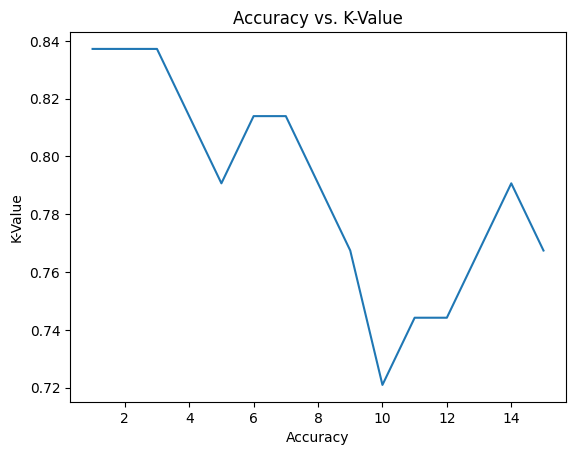

In [66]:
# Calculate and Graph classification accuracy vs k values
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, shuffle=True)

accuracies = []
k_values = []

for i in range(0, 15):
    k = i + 1
    clf.set_params(n_neighbors=k, weights='distance')
    clf.fit(X_train, y_train)
    k_values.append(k)
    accuracies.append(clf.score(X_test, y_test))

plt.plot(k_values, accuracies, label='Accuracy vs. K-Value')
plt.title("Accuracy vs. K-Value")
plt.xlabel("Accuracy")
plt.ylabel("K-Value")
plt.show()

*Discussion*

## 3 KNN Regression with normalization and distance weighting

Use the [sklean KNeighborsRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html#sklearn.neighbors.KNeighborsRegressor) on the [housing price prediction](https://axon.cs.byu.edu/data/uci_regression/housing.arff) problem.  
### 3.1 (5%) Ethical Data
Note this data set has an example of an inappropriate input feature which we discussed.  State which feature is inappropriate and discuss why.

*Discuss the innapropriate feature*

### 3.2 (15%) - KNN Regression 
- Do random 80/20 train/test splits each time
- Run with k=3
- Print the score (coefficient of determination) and Mean Absolute Error (MAE) for the train and test set for the cases of
  - No input normalization and no distance weighting
  - Normalization and no distance weighting
  - Normalization and distance weighting
- Normalize inputs features where needed but do not normalize the output

In [62]:
# Learn and experiment with housing price prediction data
reg = KNeighborsRegressor()


*Discuss your results*

### 3.3 (10%)  Different k Values
- Using housing with normalized data and distance weighting, create one graph with MAE on the test set on the y-axis and k values on the x-axis
- Use values of k from 1 to 15.  Use the same train/test split for each. 

In [63]:
# Learn and graph for different k values

Discussion

## 4. (20%) KNN with nominal and real data

- Use the [lymph dataset](https://axon.cs.byu.edu/data/uci_class/lymph.arff)
- Use a 80/20 split of the data for the training/test set
- This dataset has both continuous and nominal attributes 
- Implement a distance metric which uses Euclidean distance for continuous features and 0/1 distance for nominal. Hints:
    - Write your own distance function (e.g. mydist) and use clf = KNeighborsClassifier(metric=mydist)
    - Change the nominal features in the data set to integer values since KNeighborsClassifier expects numeric features. I used Label_Encoder on the nominal features.
    - Keep a list of which features are nominal which mydist can use to decide which distance measure to use
    - There was an occasional bug in SK version 1.3.0 ("Flags object has no attribute 'c_contiguous'") that went away when I upgraded to the lastest SK version 1.3.1 
- Use your own choice for k and other parameters

In [64]:
# Train/Predict lymph with your own distance metric

*Explain your distance metric and discuss your results*

## 5. (Optional 15% extra credit) Code up your own KNN Learner 
Below is a scaffold you could use if you want. Requirements for this task:
- Your model should support the methods shown in the example scaffold below
- Use Euclidean distance to decide closest neighbors
- Implement both the classification and regression versions
- Include optional distance weighting for both algorithms
- Run your algorithm on the magic telescope and housing data sets above and discuss and compare your results 

*Discussion*

In [65]:
from sklearn.base import BaseEstimator, ClassifierMixin

class KNNClassifier(BaseEstimator,ClassifierMixin):
    def __init__(self, columntype=[], weight_type='inverse_distance'): ## add parameters here
        """
        Args:
            columntype for each column tells you if continues[real] or if nominal[categoritcal].
            weight_type: inverse_distance voting or if non distance weighting. Options = ["no_weight","inverse_distance"]
        """
        self.columntype = columntype #Note This won't be needed until part 5
        self.weight_type = weight_type

    def fit(self, data, labels):
        """ Fit the data; run the algorithm (for this lab really just saves the data :D)
        Args:
            X (array-like): A 2D numpy array with the training data, excluding targets
            y (array-like): A 2D numpy array with the training targets
        Returns:
            self: this allows this to be chained, e.g. model.fit(X,y).predict(X_test)
        """
        return self
    
    def predict(self, data):
        """ Predict all classes for a dataset X
        Args:
            X (array-like): A 2D numpy array with the training data, excluding targets
        Returns:
            array, shape (n_samples,)
                Predicted target values per element in X.
        """
        pass

    #Returns the Mean score given input data and labels
    def score(self, X, y):
        """ Return accuracy of model on a given dataset. Must implement own score function.
        Args:
            X (array-like): A 2D numpy array with data, excluding targets
            y (array-like): A 2D numpy array with targets
        Returns:
            score : float
                Mean accuracy of self.predict(X) wrt. y.
        """
        return 0